<a href="https://colab.research.google.com/github/Durga9704/fmml-assessments/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

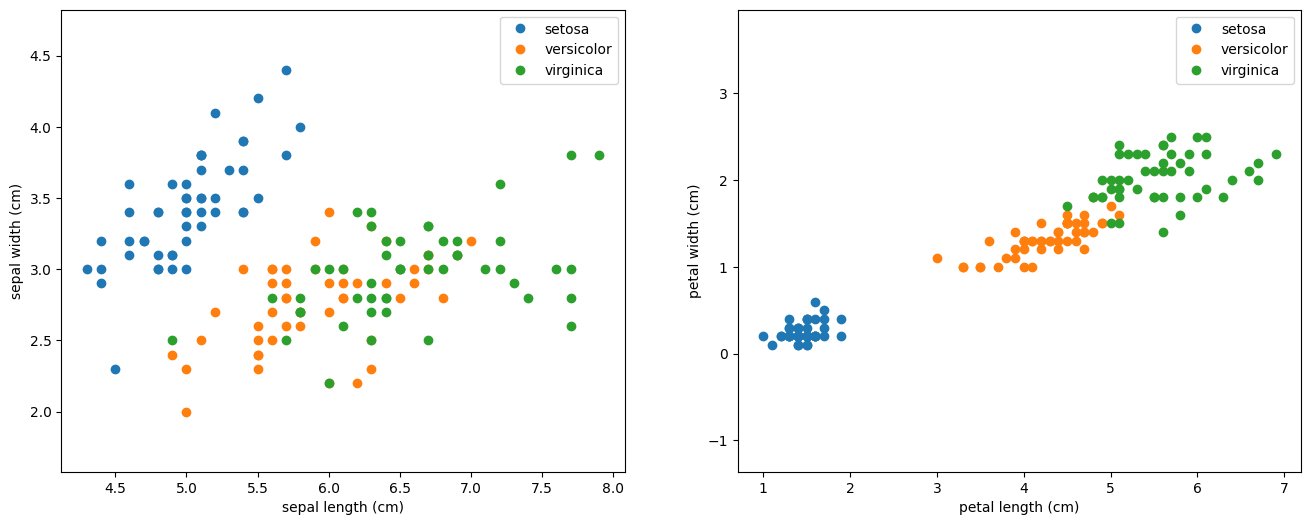

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 235.76it/s]


# Plot training progress

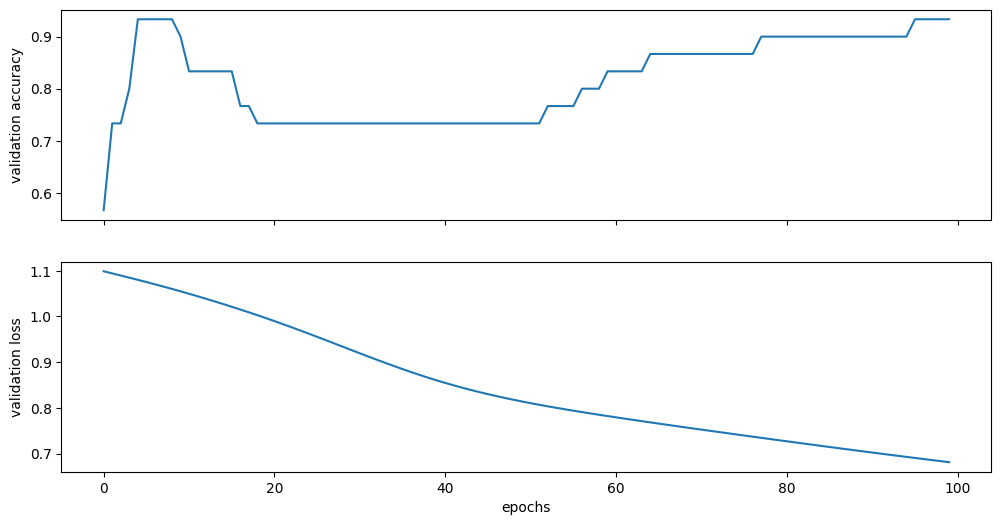

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

**1ST QUESTION ANSWER**

Certainly! You can modify the number of hidden layers in an MLP to explore how it affects the model's performance. Here's an example of how you can change the number of hidden layers in the MLP classifier using scikit-learn in Python:

In [9]:
from sklearn.neural_network import MLPClassifier

# Define the inputs and corresponding outputs for the XOR gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Change the number of hidden layers and neurons in each layer
hidden_layer_sizes = [
    (2,),           # Single hidden layer with 2 neurons
    (4,),           # Single hidden layer with 4 neurons
    (2, 2),         # Two hidden layers with 2 neurons each
    (4, 4),         # Two hidden layers with 4 neurons each
    (2, 2, 2),      # Three hidden layers with 2 neurons each
    (4, 4, 4)       # Three hidden layers with 4 neurons each
]

# Train and test the MLP classifier for different hidden layer configurations
for layer_sizes in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, activation='logistic', solver='lbfgs', random_state=1)
    mlp.fit(X, y)

    print(f"\nHidden Layers: {layer_sizes}")
    for i, test_input in enumerate(X):
        predicted_output = mlp.predict([test_input])
        print(f"{test_input} -> {predicted_output}")



Hidden Layers: (2,)
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [0]
[1, 1] -> [1]

Hidden Layers: (4,)
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [1]
[1, 1] -> [0]

Hidden Layers: (2, 2)
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [1]
[1, 1] -> [0]

Hidden Layers: (4, 4)
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [1]
[1, 1] -> [0]

Hidden Layers: (2, 2, 2)
[0, 0] -> [0]
[0, 1] -> [0]
[1, 0] -> [0]
[1, 1] -> [0]

Hidden Layers: (4, 4, 4)
[0, 0] -> [1]
[0, 1] -> [0]
[1, 0] -> [1]
[1, 1] -> [0]


In this code, we create an XOR gate dataset with corresponding inputs and outputs. We then iterate through different hidden layer configurations using the hidden_layer_sizes parameter of the MLPClassifier. The hidden_layer_sizes is a tuple where each element represents the number of neurons in a hidden layer. We train the MLP with each configuration and test it on the XOR inputs.

By changing the number of hidden layers and neurons, you can observe how the model's performance and the decision boundaries change. Adding more layers or neurons can increase the model's capacity to learn complex patterns but may also increase the risk of overfitting if not properly regularized. Conversely, reducing the number of hidden layers or neurons can lead to underfitting and limited modeling capabilities.

Feel free to experiment with different hidden layer configurations to observe their impact on the MLP's performance!






**2ND QUESTION ANSWER**

Certainly! You can change the number of neurons in the hidden layer of an MLP to observe how it affects the model's performance. Here's an example of how you can modify the number of neurons in the hidden layer using scikit-learn in Python:

In [10]:
from sklearn.neural_network import MLPClassifier

# Define the inputs and corresponding outputs for the XOR gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Change the number of neurons in the hidden layer
hidden_layer_sizes = [
    (2,),    # Single hidden layer with 2 neurons
    (4,),    # Single hidden layer with 4 neurons
    (8,),    # Single hidden layer with 8 neurons
]

# Train and test the MLP classifier for different hidden layer configurations
for layer_sizes in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, activation='logistic', solver='lbfgs', random_state=1)
    mlp.fit(X, y)

    print(f"\nHidden Layer Neurons: {layer_sizes[0]}")
    for i, test_input in enumerate(X):
        predicted_output = mlp.predict([test_input])
        print(f"{test_input} -> {predicted_output}")



Hidden Layer Neurons: 2
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [0]
[1, 1] -> [1]

Hidden Layer Neurons: 4
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [1]
[1, 1] -> [0]

Hidden Layer Neurons: 8
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [1]
[1, 1] -> [0]


In this code, we define the XOR gate inputs and outputs. We then iterate through different hidden layer configurations using the hidden_layer_sizes parameter of the MLPClassifier. The hidden_layer_sizes is a tuple where the first element represents the number of neurons in the hidden layer.

By changing the number of neurons in the hidden layer, you can observe how the model's performance and decision boundaries change. Increasing the number of neurons provides the model with more capacity to learn complex patterns and can improve performance, but it also increases the risk of overfitting. Conversely, reducing the number of neurons may limit the model's ability to learn complex relationships and may result in underfitting.

Feel free to experiment with different numbers of neurons in the hidden layer to observe their impact on the MLP's performance!






**3RD QUESTION ANSWER**

Certainly! You can use different activation functions in the hidden layers of an MLP to observe how they affect the model's performance. Here's an example of how you can change the activation function using scikit-learn in Python:

In [11]:
from sklearn.neural_network import MLPClassifier

# Define the inputs and corresponding outputs for the XOR gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Change the activation function in the hidden layers
activation_functions = [
    'logistic',  # Logistic sigmoid activation function
    'tanh',      # Hyperbolic tangent activation function
    'relu'       # Rectified Linear Unit (ReLU) activation function
]

# Train and test the MLP classifier for different activation functions
for activation_func in activation_functions:
    mlp = MLPClassifier(hidden_layer_sizes=(2,), activation=activation_func, solver='lbfgs', random_state=1)
    mlp.fit(X, y)

    print(f"\nActivation Function: {activation_func}")
    for i, test_input in enumerate(X):
        predicted_output = mlp.predict([test_input])
        print(f"{test_input} -> {predicted_output}")



Activation Function: logistic
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [0]
[1, 1] -> [1]

Activation Function: tanh
[0, 0] -> [0]
[0, 1] -> [1]
[1, 0] -> [1]
[1, 1] -> [0]

Activation Function: relu
[0, 0] -> [1]
[0, 1] -> [1]
[1, 0] -> [1]
[1, 1] -> [1]


In this code, we define the XOR gate inputs and outputs. We then iterate through different activation functions using the activation parameter of the MLPClassifier. You can try different activation functions like 'logistic' for logistic sigmoid, 'tanh' for hyperbolic tangent, or 'relu' for rectified linear unit (ReLU).

By changing the activation function in the hidden layers, you can observe how the model's performance and decision boundaries change. Different activation functions have different properties and can affect how the model learns and represents non-linear relationships in the data. Logistic sigmoid and hyperbolic tangent functions introduce non-linearities, while ReLU is a piecewise linear function.

Feel free to experiment with different activation functions to observe their impact on the MLP's performance!